In [1]:
import np as np

from constants import *
from scripts.scripts import *
from scripts.gdal_scripts import *
import geopandas as gp

In [2]:
main_name = "test_grid02"
gdal_print_metadata(tif_name=main_name)

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02.tif
Size is 256, 256
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000002829859375,0.000001506484375)
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) 
Lower Left  (   9.0658430,  56.8351945) 
Upper Right (   9.0665675,  56.8348089) 
Lower Right (   9.0665675,  56.8351945) 
Center      (   9.0662053,  56.8350017) 
Band 1 Block=256x16 Type=Int16, ColorInterp=Gray



In [3]:
df = get_pandas_from_csv(csv_name=main_name+"_coor")

In [4]:
import numpy as np
df[df["value"] >= 50]

PE_Conditions = [
    (df['value'] < 50),
    (df['value'] >= 50),]
PE_Categories = [25, 75]
df['simp_value'] = np.select(PE_Conditions, PE_Categories)
df

,Unnamed: 0,lat,lon,value,simp_value
0,0,56.835195,9.065843,100,75
1,1,56.835185,9.065843,100,75
2,2,56.835176,9.065843,80,75
3,3,56.835167,9.065843,80,75
4,4,56.835158,9.065843,80,75
...,...,...,...,...,...
425,425,56.834846,9.066567,0,25
426,426,56.834836,9.066567,0,25
427,427,56.834827,9.066567,0,25
428,428,56.834818,9.066567,0,25


In [5]:
geo_df = dataframe_to_shp(input_df=df)

In [6]:
geo_df

,Unnamed: 0,value,simp_value,geometry
0,0,100,75,POINT (9.06584 56.83519)
1,1,100,75,POINT (9.06584 56.83519)
2,2,80,75,POINT (9.06584 56.83518)
3,3,80,75,POINT (9.06584 56.83517)
4,4,80,75,POINT (9.06584 56.83516)
...,...,...,...,...
425,425,0,25,POINT (9.06657 56.83485)
426,426,0,25,POINT (9.06657 56.83484)
427,427,0,25,POINT (9.06657 56.83483)
428,428,0,25,POINT (9.06657 56.83482)


In [9]:
geo_df = geo_df.drop(columns=['Unnamed: 0','value'])

In [10]:
geo_df

,simp_value,geometry
0,75,POINT (9.06584 56.83519)
1,75,POINT (9.06584 56.83519)
2,75,POINT (9.06584 56.83518)
3,75,POINT (9.06584 56.83517)
4,75,POINT (9.06584 56.83516)
...,...,...
425,25,POINT (9.06657 56.83485)
426,25,POINT (9.06657 56.83484)
427,25,POINT (9.06657 56.83483)
428,25,POINT (9.06657 56.83482)


In [12]:
tif_name = "test_grid02_full_spread"
geo_df.to_file(filename=SHP_PATH+tif_name+'.shp.zip', driver='ESRI Shapefile', crs='EPSG:4326')

In [13]:
tif_name_full = gdal_run_interpolation(
    input_shp_name=tif_name,
    target_column="simp_value",
    output_tif_name=tif_name,
    algorithm="nearest",
    radius1=0.00006,
    radius2=0.00001,
    width=64,
    height=64,
)

Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-outsize', '64', '64', '-a', 'nearest:power=1:radius1=6e-05:radius2=1e-05:', '-zfield', 'simp_value']
Running interpolation on: shapefiles/test_grid02_full_spread.shp.zip
Saving to: tif_files/test_grid02_full_spread-nearest-6e-05-1e-05.tif


In [51]:
gdal_print_metadata(tif_name=tif_name_full)

Driver: GTiff/GeoTIFF
Files: tif_files/test_grid02_full_spread-nearest-1-None-6e-05-1e-05-None-0-0.tif
Size is 64, 64
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (9.065843041000001,56.834808879999997)
Pixel Size = (0.000011319437500,0.000006025937500)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (   9.0658430,  56.8348089) (  9d 3'57.03"E, 56d50' 5.31"N)
Lower Left  (   9.0658430,  56.8351945) (  9d 3'57.03

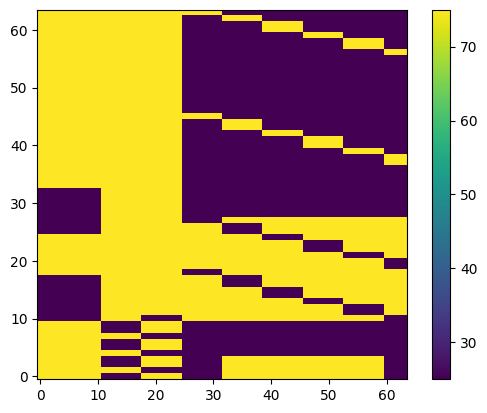

In [52]:
plot_raster(tif_name=tif_name_full)

In [104]:
print(tif_name_full)

test_grid02_full_spread-nearest-1-None-6e-05-1e-05-None-0-0


In [54]:
make_polygons(
    input_tif=tif_name_full,
    mask='none',
    options=["-mask",tif_name_full]

Creating output shapefiles/test_grid02_full_spread-nearest-1-None-6e-05-1e-05-None-0-0.shp.zip of format ESRI Shapefile.


Open shapefile of polygons

In [66]:
polygon_df = gp.read_file(SHP_PATH+tif_name_full+'.shp.zip')

In [78]:
bins = [25.0,75.0]
polygon_dict = {}
for bin in bins:
    polygon_dict[bin] = polygon_df[polygon_df['DN'] == bin]["geometry"].to_dict()

In [102]:
a_polygon = polygon_dict[25.0][9]

In [103]:
a_polygon.plot()

AttributeError: 'Polygon' object has no attribute 'plot'

In [88]:
a_polygon.minimum_clearance

1.2051875003749046e-05

In [98]:
for _, polygon in polygon_dict[25.0].items():
    print(list(polygon.exterior.coords))

[(9.0659675548125, 56.83480888), (9.0659675548125, 56.8348149059375), (9.066046790875001, 56.8348149059375), (9.066046790875001, 56.83480888), (9.0659675548125, 56.83480888)]
[(9.0659675548125, 56.834820931875), (9.0659675548125, 56.83483298375), (9.066046790875001, 56.83483298375), (9.066046790875001, 56.834820931875), (9.0659675548125, 56.834820931875)]
[(9.0659675548125, 56.8348390096875), (9.0659675548125, 56.834851061562496), (9.066046790875001, 56.834851061562496), (9.066046790875001, 56.8348390096875), (9.0659675548125, 56.8348390096875)]
[(9.0661260269375, 56.83480888), (9.0661260269375, 56.8348149059375), (9.066046790875001, 56.8348149059375), (9.066046790875001, 56.834820931875), (9.0661260269375, 56.834820931875), (9.0661260269375, 56.83483298375), (9.066046790875001, 56.83483298375), (9.066046790875001, 56.8348390096875), (9.0661260269375, 56.8348390096875), (9.0661260269375, 56.834851061562496), (9.066046790875001, 56.834851061562496), (9.066046790875001, 56.8348570875), (

In [2]:
file = gp.read_file(SHP_PATH+tif_name_full+'.shp.zip')

NameError: name 'tif_name_full' is not defined

In [9]:
from osgeo_utils.samples import ogr2ogr
def main():
  ogr2ogr.main(["","-f", "KML", "out75.kml", SHP_PATH+"new75.shp.zip","-simplify", "0.0001"])
main()

In [122]:
kml = gp.read_file("out75.kml")

DriverError: unsupported driver: 'KML'